## **Necessary Imports**

In [19]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_theme(style='whitegrid')

## **Mounting Drive**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Initializing data folder**

In [21]:
%cd /content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data/

/content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data


## **Reading csv file**

In [22]:
df = pd.read_csv("final_dataset.csv")

## **Viewing dataframe**

In [23]:
df.head()

,CustomerID,Revenue_given,Frequency,Recency,United Kingdom or Not
0,12346,0.00,2,326,1
1,12348,1797.24,31,76,0
2,12349,1757.55,73,19,0
3,12350,334.40,17,311,0
4,12352,1545.41,95,73,0


# **EDA & Data Visualization**

## **Number of Customers from UK and other countries**

{1: 3284, 0: 332}


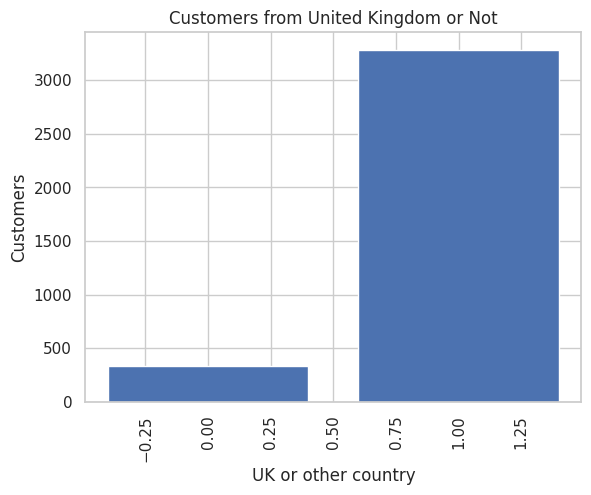

In [24]:
customer_countries = df['United Kingdom or Not'].value_counts().to_dict()
print(customer_countries)
x = customer_countries.keys()
y = customer_countries.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('UK or other country')
plt.ylabel('Customers')
plt.title('Customers from United Kingdom or Not')
plt.show()

## **Customer features visualization**

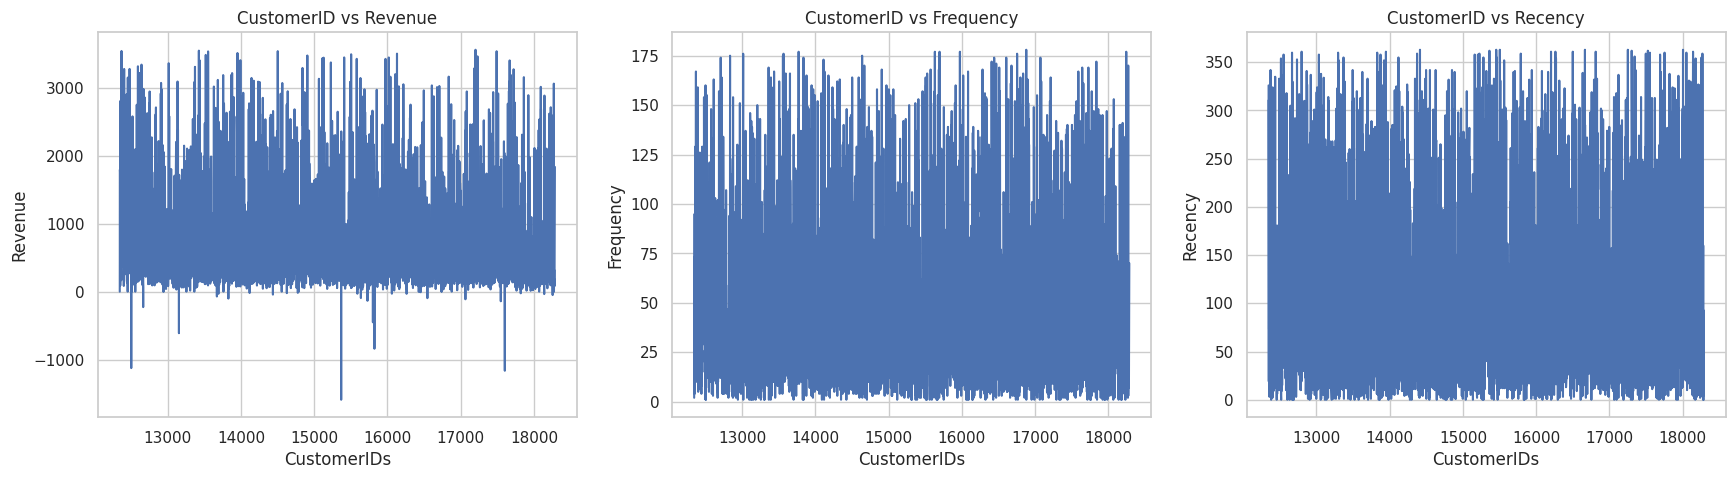

In [25]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
plt.plot("CustomerID", "Revenue_given", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Revenue")
plt.title("CustomerID vs Revenue")

plt.subplot(1,3,2)
plt.plot("CustomerID", "Frequency", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Frequency")
plt.title("CustomerID vs Frequency")

plt.subplot(1,3,3)
plt.plot("CustomerID", "Recency", data=df)
plt.xlabel("CustomerIDs")
plt.ylabel("Recency")
plt.title("CustomerID vs Recency")

plt.show()

## **Viewing mean, standard deviation and other values for numeric columns**

In [26]:
df.drop(['CustomerID', 'United Kingdom or Not'], axis=1).describe()

,Revenue_given,Frequency,Recency
count,3616.000000,3616.000000,3616.000000
mean,783.709584,47.261338,103.279867
std,742.458719,41.834774,95.528931
min,-1592.490000,1.000000,0.000000
25%,256.215000,15.000000,25.000000
50%,526.860000,32.000000,69.000000
75%,1059.690000,69.000000,164.000000
max,3563.850000,178.000000,363.000000


## **If any kind of relationship exists between data**

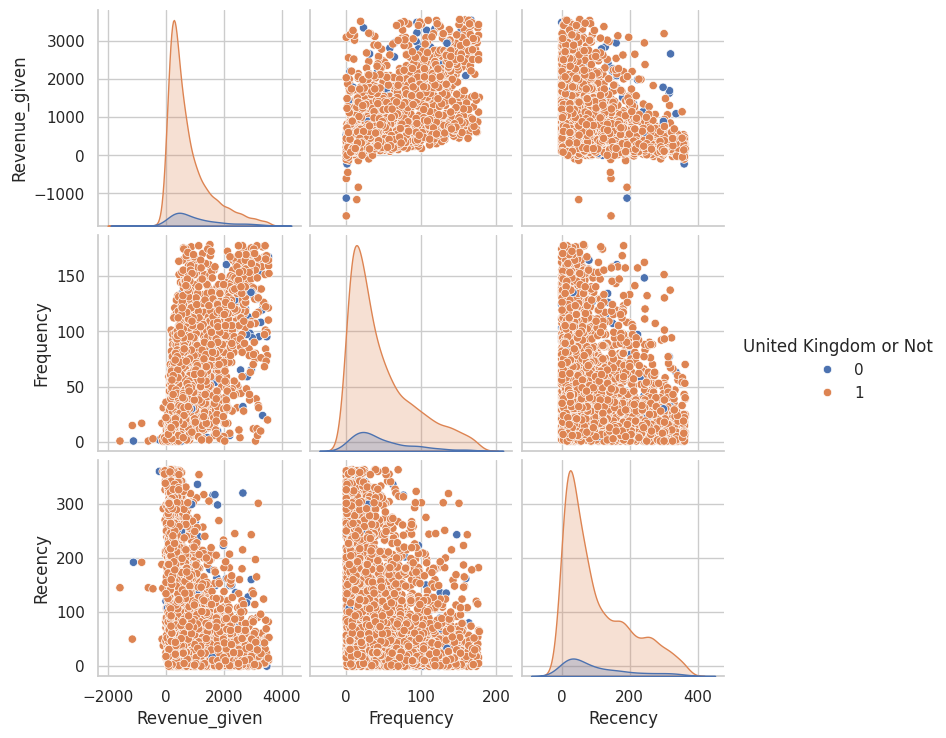

In [27]:
sns.pairplot(df, vars=["Revenue_given", "Frequency", "Recency"], hue="United Kingdom or Not")
plt.show()

### **We can't see any kind of noticable relationships in between the data. So, we have to extract features using extraction techniques.**

## **Preparing data for dimensionality reduction**

In [28]:
x = df.drop(["CustomerID"], axis=1)
x = x.sample(frac=1, random_state = 42).reset_index(drop=True)

## **We will be using PCA extract features into lower dimension.**

In [29]:
pca = PCA(n_components=2)
train_features = pca.fit_transform(x)

## **Viewing relationships in scatter plot**

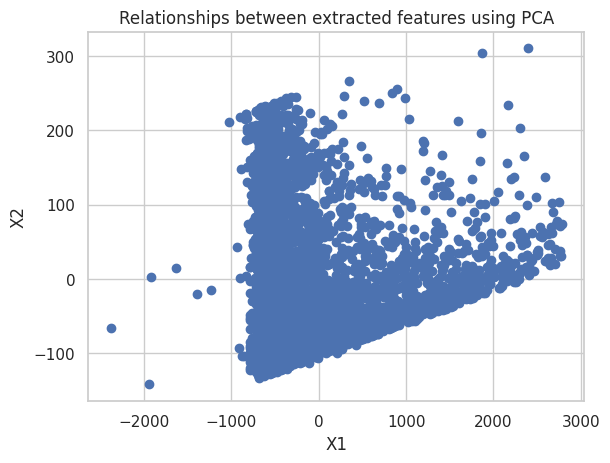

In [31]:
x1 = [train_features[i][0] for i in range(len(train_features))]
x2 = [train_features[i][1] for i in range(len(train_features))]

plt.scatter(x1, x2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Relationships between extracted features using PCA")
plt.show()